Name: Rizu Jain | UIN: 430000753

# CSCE 633 Homework 2 : Urban Traffic Prediction



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import pearsonr

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

In [2]:
# Import data into dataframes
df_train = pd.read_csv('hw2__question1_train.csv', sep = ',')
df_test = pd.read_csv('hw2__question1_test.csv', sep = ',')

# Segregate the outcome column in both train and test data
newX = df_train.iloc[:,:-1]
testX = df_test.iloc[:,:-1]
newY= df_train.iloc[:,-1]
testY = df_test.iloc[:,-1]

# (i.) Data Exploration

Histogram of Features and Outcome of interest

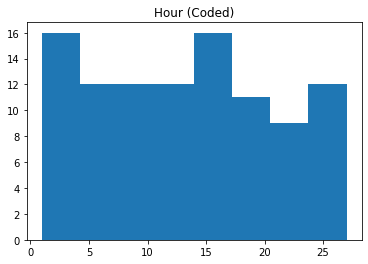

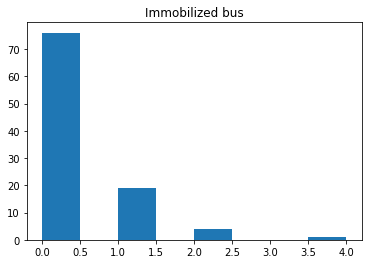

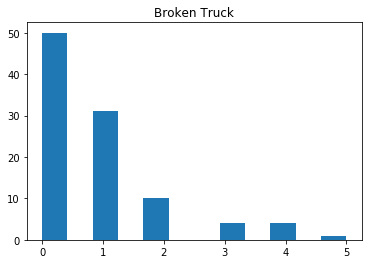

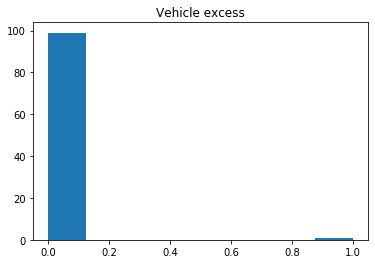

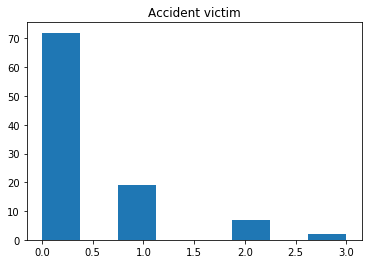

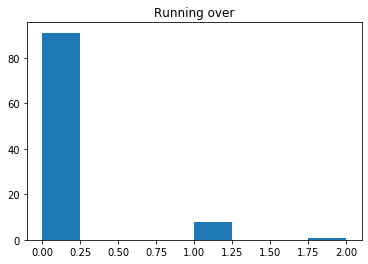

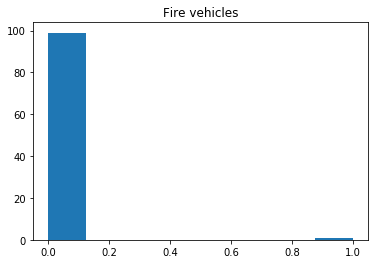

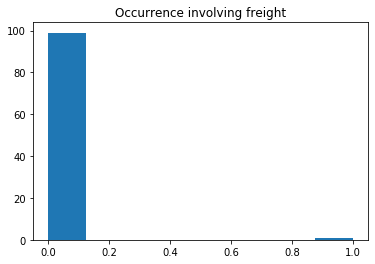

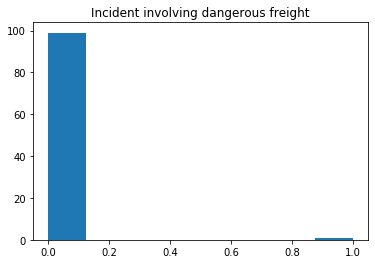

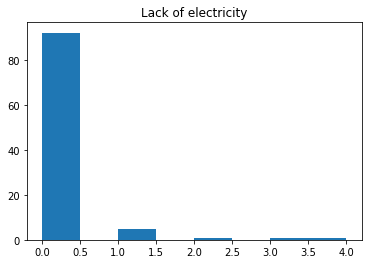

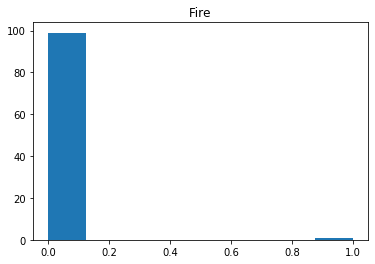

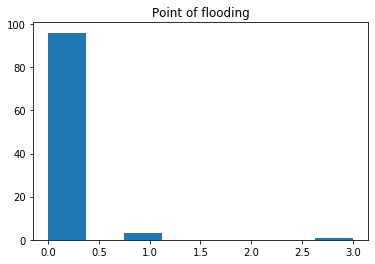

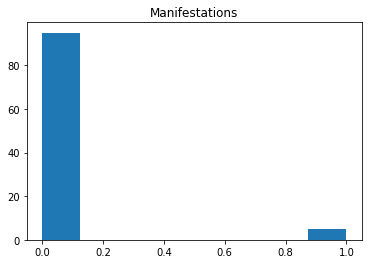

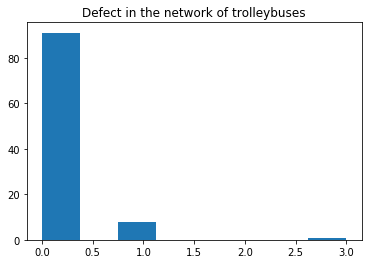

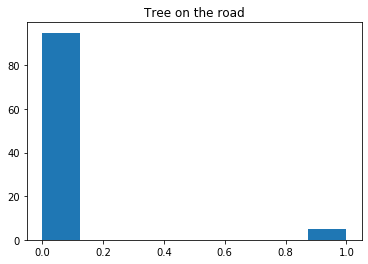

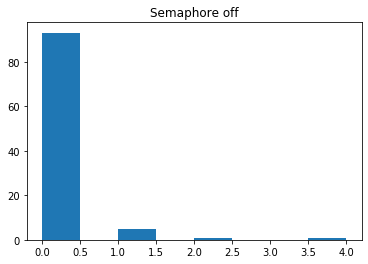

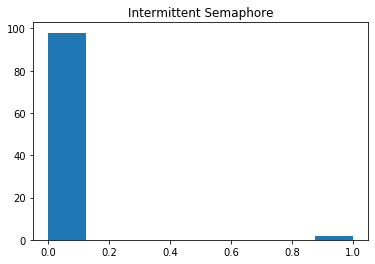

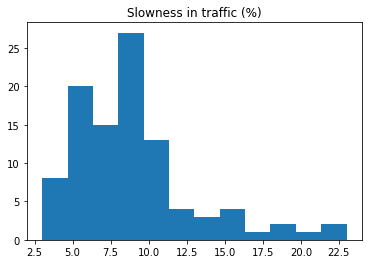

<Figure size 432x288 with 0 Axes>

In [3]:
# Plot histogram of features
for i in range(df_train.shape[1]):
    plt.hist(df_train.iloc[:,i], bins='auto')
    plt.title(df_train.columns[i])
    plt.figure()
    

# (ii.) Data Exploration

Pearson Coefficient between each feature and the outcome of interest

In [4]:
# Computer pearson's correlation coefficient between all features and the outcome of interest
print("Computation of Pearson's correlation coefficient"
      " between features and the outcome of interest (% slowness in traffic): \n")
print("Correlation  \t Feature ")
for i in range(df_train.shape[1]-1):
    corr, p = pearsonr(df_train.iloc[:,i], newY)
    print("%0.3f\t\t" % corr, df_train.columns[i] )

Computation of Pearson's correlation coefficient between features and the outcome of interest (% slowness in traffic): 

Correlation  	 Feature 
0.671		 Hour (Coded)
0.155		 Immobilized bus
0.147		 Broken Truck
-0.146		 Vehicle excess
0.127		 Accident victim
-0.012		 Running over
0.184		 Fire vehicles
0.057		 Occurrence involving freight
0.032		 Incident involving dangerous freight
0.574		 Lack of electricity
-0.045		 Fire
0.456		 Point of flooding
-0.056		 Manifestations
-0.168		 Defect in the network of trolleybuses
-0.079		 Tree on the road
0.429		 Semaphore off
-0.136		 Intermittent Semaphore


# (iii.) Implementation of Linear Regression

In [5]:
# Implementaion of Linear Regression

# Add the ones column in the input matrix in the train data
intercept = np.ones((newX.shape[0],1))
X = np.concatenate((intercept,newX.values),1)

# Add the ones column in the input matrix in the test data
intercept_test = np.ones((df_test.shape[0],1))
X_test = np.concatenate((intercept_test,testX.values),1)

# Compute the optimal weight vector w* using the OLS solution
term1 = X.T.dot(X)
term1_inv = np.linalg.inv(term1)
term2 = X.T.dot(newY.values)
w = term1_inv.dot(term2)

# (iv.) Testing of model

In [6]:
# Predict Y (outcome of interest) on test data
Y_pred = np.matmul(X_test,np.transpose(w))

# Using the Pearson's Correlation Coefficient
# Compute the correlation between predicted and actual output
test_score, test_score_p = pearsonr(Y_pred,testY.values)
print("Pearson's Correlation Coefficient Metrics: ")
print("r=" + format(test_score, '.2f') + ", p=" + format(test_score_p, '.2f'))

# Using the RSS
# Compute the RSS between predicted and actual output
rss = np.sum(np.square(Y_pred - testY.values))
print("Residual Sum of Squares Metrics: ")
print("rss_err=" + format(rss, '.2f'))

Pearson's Correlation Coefficient Metrics: 
r=0.82, p=0.00
Residual Sum of Squares Metrics: 
rss_err=501.86


# (v.) Different Feature Combinations 


In [7]:
# Helper Modular Function

def test_linreg(newX_drop, testX_drop):
    
    # Implementaion of Linear Regression
    # Add the ones column in the input matrix in the train data
    intercept = np.ones((newX_drop.shape[0],1))
    X = np.concatenate((intercept,newX_drop.values),1)
    # Add the ones column in the input matrix in the test data
    intercept_test = np.ones((testX_drop.shape[0],1))
    X_test = np.concatenate((intercept_test,testX_drop.values),1)
    # Compute the optimal weight vector w* using the OLS solution
    term1 = X.T.dot(X)
    term1_inv = np.linalg.inv(term1)
    term2 = X.T.dot(newY.values)
    w = term1_inv.dot(term2)

    # Predict Y (outcome of interest) on test data
    Y_pred = np.matmul(X_test,np.transpose(w))

    # Compute the correlation between predicted and actual output
    test_score, test_score_p = pearsonr(Y_pred,testY.values)
    # Compute the RSS between predicted and actual output
    rss = np.sum(np.square(Y_pred - testY.values))
    
    plt.hist(abs(Y_pred - testY.values))
    plt.title("Histogram depicting the absolute errors")
    plt.figure()
    
    return test_score, test_score_p, rss

Pearson's Correlation Coefficient Metrics: 
r=0.82, p=0.00
Residual Sum of Squares Metrics: 
rss_err=498.86


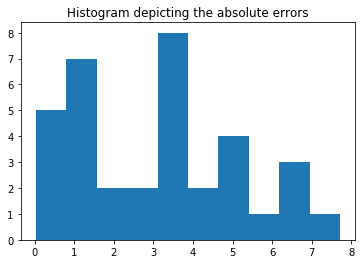

<Figure size 432x288 with 0 Axes>

In [8]:
# Feature Edit 1
# Remove three features with correlation < 0.5

drop_col1 = ['Fire','Incident involving dangerous freight','Running over']
newX_drop1 = newX.drop(columns=drop_col1)
testX_drop1 = testX.drop(columns=drop_col1)
test_score, test_score_p, rss = test_linreg(newX_drop1, testX_drop1)
print("Pearson's Correlation Coefficient Metrics: ")
print("r=" + format(test_score, '.2f') + ", p=" + format(test_score_p, '.2f'))
print("Residual Sum of Squares Metrics: ")
print("rss_err=" + format(rss, '.2f'))

Pearson's Correlation Coefficient Metrics: 
r=0.80, p=0.00
Residual Sum of Squares Metrics: 
rss_err=447.93


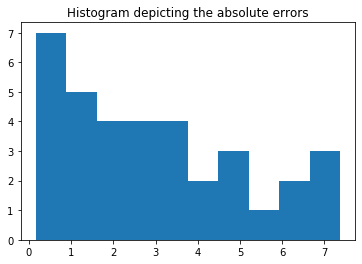

<Figure size 432x288 with 0 Axes>

In [9]:
# Feature Edit 2
# Use only three features with maximum |correlation| 

drop_col2 = columns=['Point of flooding','Lack of electricity','Hour (Coded)']
newX_drop2 = newX[drop_col2]
testX_drop2 = testX[drop_col2]
test_score, test_score_p, rss = test_linreg(newX_drop2, testX_drop2)
print("Pearson's Correlation Coefficient Metrics: ")
print("r=" + format(test_score, '.2f') + ", p=" + format(test_score_p, '.2f'))
print("Residual Sum of Squares Metrics: ")
print("rss_err=" + format(rss, '.2f'))

In [10]:
# Feature Edit 3
# Check the correlation between features
# if two features are highly correlated, one can be removed to reduce redundancy and dimension of feature space

# Pearson's correlation between pairs of features
numFeatures = df_train.shape[1]-1

print("Feature Columns with absolute correlation greater than 0.5: ")
for i in range(numFeatures):
    for j in range(numFeatures):
        corr, p = pearsonr(newX.iloc[:,i], newX.iloc[:,j])
        # print(format(corr, '.2f'), end = ', ')
        if (abs(corr) > 0.5) and (i != j):
            print(i, j)
    # print()

Feature Columns with absolute correlation greater than 0.5: 
9 11
9 15
11 9
15 9


Pearson's Correlation Coefficient Metrics: 
r=0.80, p=0.00
Residual Sum of Squares Metrics: 
rss_err=514.16


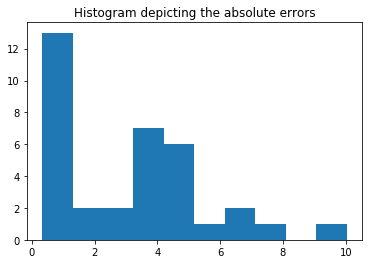

<Figure size 432x288 with 0 Axes>

In [11]:
# We observe that following pair of features are highly correlated:
    # 'Lack of electricity' (9) and 'Point of flooding' (11)
    # 'Lack of electricity' (9) and'Semaphore off' (15)
    
# Hence we may drop the 'Lack of electricity' feature and test.

drop_col3 = ['Lack of electricity']
newX_drop3 = newX.drop(columns=drop_col3)
testX_drop3 = testX.drop(columns=drop_col3)
test_score, test_score_p, rss = test_linreg(newX_drop3, testX_drop3)
print("Pearson's Correlation Coefficient Metrics: ")
print("r=" + format(test_score, '.2f') + ", p=" + format(test_score_p, '.2f'))
print("Residual Sum of Squares Metrics: ")
print("rss_err=" + format(rss, '.2f'))


Three observations were made:
1. Upon dropping the three features that had minimum correlation with the outcome of interest, RSS got reduced with no reduction in correlation metrics.
2. Upon using only three features, the ones with maximum correlation with the outcome of interest, RSS got further reduced with a slight decrease in correlation metrics.
3. By dropping a feature with a decent correlation with the outcome of interest but redundant, there was only a slight decrease in correlation metrics. Although some increase in RSS could be observed.

# (vi.) Implementation of Logistic Regression

In [12]:
# Binarise the output (Slowness in traffic (%))
mean_thres = np.mean(newY)
newY_bin = (newY > mean_thres).astype(np.int_)
testY_bin = (testY > mean_thres).astype(np.int_)

In [13]:
# Logistic Regression using scikit.learn

# Train the model
logreg = LogisticRegression(penalty='none', solver='lbfgs', max_iter = 10000)
logreg.fit(newX,newY_bin)

# Predict on test data
y_pred=logreg.predict(testX)

print('Coefficient of each feature: \n', logreg.coef_)
print("Accuracy:",metrics.accuracy_score(testY_bin, y_pred))
print("Precision:",metrics.precision_score(testY_bin, y_pred))
print("Recall:",metrics.recall_score(testY_bin, y_pred))

Coefficient of each feature: 
 [[ 1.89257219e-01  4.50414910e-01  1.26057504e-01 -8.71892960e+00
   5.75540431e-02 -1.25063014e+00  2.52578729e+01  3.79245872e+01
   5.12618523e+01  3.04937299e-01 -3.61385696e+01  8.28954991e+01
  -2.46284455e+01 -7.75676030e-01  1.32735399e+00  6.13680124e-01
  -1.69957370e+01]]
Accuracy: 0.5714285714285714
Precision: 1.0
Recall: 0.4827586206896552


Logistic: f1=0.651 auc=0.955


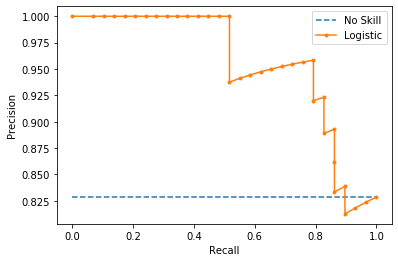

In [14]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib import pyplot
# predict probabilities
lr_probs = logreg.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logreg.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testY_bin, lr_probs)
lr_f1, lr_auc = f1_score(testY_bin, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testY_bin[testY_bin==1]) / len(testY_bin)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: ROC AUC=0.793


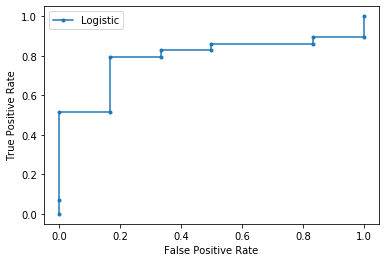

In [15]:
# calculate scores
lr_auc = roc_auc_score(testY_bin, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(testY_bin, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot

# (vii.) Regularisation

In [16]:
# Split the trainX and trainY into numSplits parts.
# Use 4 for fitting the model, 1 for validation
numSplits = 1
random_state = 12883823

rkf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=random_state)

split = 0
L = [0.001, 0.005, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000]
# L = [0.01, 0.1, 1, 10]
cross_val = [0 for _ in L]

for train, test in rkf.split(newX):
    trainX = newX.values[train,:]
    trainY = newY.values[train]

    devX = newX.values[test,:]
    devY = newY.values[test]

    mean_thres = np.mean(trainY)
    trainY_bin = (trainY > mean_thres).astype(np.int_)
    devY_bin = (devY > mean_thres).astype(np.int_)
        
    for index in range(len(L)):
        # Train the model
        logreg = LogisticRegression(penalty='l2', C=L[index], solver='lbfgs', max_iter = 1000)
        logreg.fit(trainX,trainY_bin)

        # Predict on devset
        y_pred=logreg.predict(devX)
        
        acc_l = metrics.accuracy_score(devY_bin, y_pred)
        cross_val[index] += acc_l
        # print("\tsplit = ",split,"  Accuracy : ", acc_l,"  L = ",L[index],)
    
    split += 1
    

In [17]:
bestL_idx = cross_val.index(max(cross_val))
print("Best L value of regularisation: ", L[bestL_idx], "\nAccuracy on Training Set: ", cross_val[bestL_idx]/10)

Best L value of regularisation:  0.5 
Accuracy on Training Set:  0.8400000000000001


In [18]:
# Train the model
logreg = LogisticRegression(penalty='l2',C=L[bestL_idx], solver='lbfgs', max_iter = 10000)
logreg.fit(newX,newY_bin)

# Predict on test data
y_pred=logreg.predict(testX)

print('Coefficient of each feature: \n', logreg.coef_)
print("Accuracy on Test Set:",metrics.accuracy_score(testY_bin, y_pred))


Coefficient of each feature: 
 [[ 0.20100647  0.38275589  0.09387355 -0.01645758  0.04317223 -0.38743665
   0.05833577  0.16306789  0.19422704  0.25648591 -0.08685401  0.29662941
   0.22899601 -0.28210608  0.12692961  0.32642708 -0.05365081]]
Accuracy on Test Set: 0.7142857142857143


We find that the best model on training data had regularisation value = 0.5 with which the highest accuracy was obtained.
Using it on the test set, the accuracy improved from 0.57 (without regularisation) to 0.71 (with regularisation.)